In [1]:
import numpy as np
import hdf5plugin
import h5py
import matplotlib.pyplot as plt
import tifffile as tif

import tensorrt as trt
from helper import engine_build_from_onnx, mem_allocation, inference
import pycuda.autoinit  # must be in the same thread as the actual cuda execution

In [2]:
compout = tif.imread('outputs/bdp_000001.1.tiff')

In [3]:
onnx_mdel_1 = "/home/beams0/SKANDEL/code/TensorRT/tools/pytorch-quantization/examples/quantized_nn_batch_8.onnx"

In [4]:
onnx_mdel_2 = "/home/beams/SKANDEL/code/anakha_ptychoNN-test/models_02_10_23/ptychoNN_8.onnx"

In [5]:
data0 = np.load('diff_scan_810_512x512.npy')

In [6]:
data0.shape

(1, 512, 512)

In [7]:
context = pycuda.autoinit.context
trt_engine = engine_build_from_onnx(onnx_mdel_2, dtype="float16")

In [8]:
trt_hin, trt_hout, trt_din, trt_dout, trt_stream = mem_allocation(trt_engine)
trt_context = trt_engine.create_execution_context()

In [9]:
batch = np.tile(data0, (8, 1, 1))

In [10]:
batch.shape

(8, 512, 512)

In [11]:
np.copyto(trt_hin, batch.astype(np.float32).ravel())

In [12]:
pred = np.array(
            inference(trt_context, trt_hin, trt_hout, trt_din, trt_dout, trt_stream)
        )

In [13]:
pred = pred.reshape(8, 128, 128)

In [14]:
np.abs(pred - compout[None, ...]).sum()

12.528531

In [37]:
context.pop()

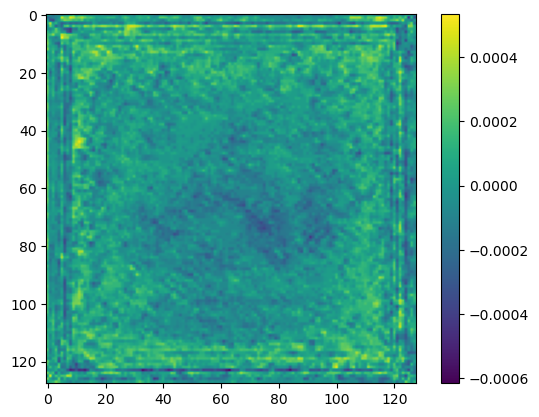

In [16]:
plt.imshow(pred[0] - compout)
plt.colorbar()

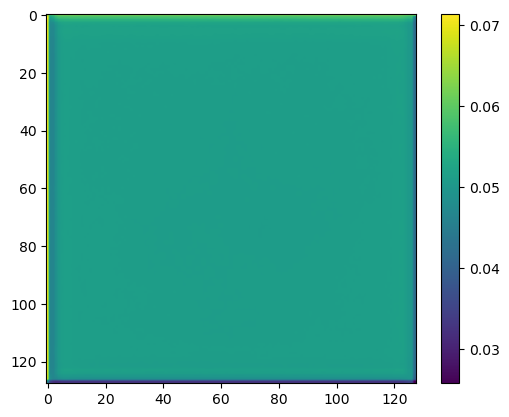

In [17]:
plt.imshow(pred[0])
plt.colorbar()